# Analyzing ride-share data

In [1]:
# install the necessary libraries
import pandas as pd

In [2]:
#This imports rideshare data from march 2022 to february 2023

march2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-03-divvy-tripdata.csv')
april2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-04-divvy-tripdata.csv')
may2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-05-divvy-tripdata.csv')
june2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-06-divvy-tripdata.csv')
july2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-07-divvy-tripdata.csv')
august2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-08-divvy-tripdata.csv')
september2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-09-divvy-tripdata.csv')
october2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-10-divvy-tripdata.csv')
november2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-11-divvy-tripdata.csv')
december2022 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2022-12-divvy-tripdata.csv')
january2023 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2023-01-divvy-tripdata.csv')
february2023 = pd.read_csv('D:/Case Study - Cyclistic/CSV_original/2023-02-divvy-tripdata.csv')

#example of march2022.head()

In [3]:
#check to make sure that all columns have similar names and data types
march2022.dtypes, april2022.dtypes, may2022.dtypes, june2022.dtypes, july2022.dtypes, august2022.dtypes,

(ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 dtype: object,
 ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 dtype: object,
 ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_

In [4]:
#check to make sure that all columns have similar names and data types
september2022.dtypes, october2022.dtypes, november2022.dtypes, december2022.dtypes, january2023.dtypes, february2023.dtypes

(ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 dtype: object,
 ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_station_id       object
 end_station_name       object
 end_station_id         object
 start_lat             float64
 start_lng             float64
 end_lat               float64
 end_lng               float64
 member_casual          object
 dtype: object,
 ride_id                object
 rideable_type          object
 started_at             object
 ended_at               object
 start_station_name     object
 start_

## Merging data together

In [5]:
#now that we know they all have similar datatypes an titles we can merge the data together
#merging data replace the blank observations with NaN
summer = june2022.merge(july2022, how="outer")
summer = summer.merge(august2022,how="outer")

spring = march2022.merge(april2022, how="outer")
spring = spring.merge(may2022,how="outer")

winter = december2022.merge(january2023, how="outer")
winter = winter.merge(february2023,how="outer")

fall = september2022.merge(october2022, how="outer")
fall = fall.merge(november2022,how="outer")
fall.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual


In [6]:
#how many observations per season
summer.shape, spring.shape, winter.shape, fall.shape
#seems like there is around 5 million observations

((2378624, 13), (1290149, 13), (562552, 13), (1597759, 13))

In [7]:
#merge all the seasonal observations
ss = summer.merge(spring,how = "outer")
wf = winter.merge(fall, how= "outer")
all_trips = ss.merge(wf, how="outer")
all_trips.shape

(5829084, 13)

## Data conversion

In [8]:
all_trips.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [9]:
#started_at and ended_at should be in date format
all_trips['started_at'] = pd.to_datetime(all_trips['started_at'])
all_trips['ended_at'] = pd.to_datetime(all_trips['ended_at'])
all_trips.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [10]:
#now that the data is converted into date time format we can add new columns about the individual trips
all_trips['start_date'] = all_trips['started_at'].dt.date
all_trips['end_date'] = all_trips['ended_at'].dt.date

all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual,2022-06-30,2022-06-30
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual,2022-06-30,2022-06-30
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual,2022-06-30,2022-06-30
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual,2022-06-30,2022-06-30
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual,2022-06-29,2022-06-29


In [11]:
#now lets get the start and end hour to understand trip duration
all_trips['start_hour'] = all_trips['started_at'].dt.hour
all_trips['end_hour'] = all_trips['ended_at'].dt.hour

all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_hour,end_hour
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual,2022-06-30,2022-06-30,17,17
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual,2022-06-30,2022-06-30,18,18
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual,2022-06-30,2022-06-30,11,12
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual,2022-06-30,2022-06-30,11,11
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual,2022-06-29,2022-06-29,23,23


In [12]:
#now lets create a column for trip duration in minutes
all_trips['duration_min'] = (all_trips['ended_at'] - all_trips['started_at']).apply(lambda x: x.total_seconds() // 60)
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_hour,end_hour,duration_min
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual,2022-06-30,2022-06-30,17,17,7.0
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual,2022-06-30,2022-06-30,18,18,7.0
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual,2022-06-30,2022-06-30,11,12,13.0
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual,2022-06-30,2022-06-30,11,11,4.0
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual,2022-06-29,2022-06-29,23,23,8.0


In [13]:
#now lets create another column for month
all_trips['month'] = all_trips['started_at'].dt.month
all_trips.sample(n=10).head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_hour,end_hour,duration_min,month
1217639,431464DD6E19D286,classic_bike,2022-07-27 17:10:28,2022-07-27 17:32:32,Clinton St & Washington Blvd,WL-012,State St & Pearson St,TA1307000061,41.883380,-87.641170,41.897448,-87.628722,casual,2022-07-27,2022-07-27,17,17,22.0,7
745034,FBC56313395F5F6E,classic_bike,2022-06-06 19:11:09,2022-06-06 19:18:36,Clark St & Schiller St,TA1309000024,Lincoln Park Conservatory,LP-,41.907993,-87.631501,41.923931,-87.635825,member,2022-06-06,2022-06-06,19,19,7.0,6
4442255,0A6C41DA1D1731EB,classic_bike,2022-09-25 08:35:35,2022-09-25 08:42:50,Western Ave & Fillmore St,644,Paulina St & Flournoy St,KA1504000104,41.868563,-87.686234,41.872950,-87.669130,member,2022-09-25,2022-09-25,8,8,7.0,9
2676870,BEADC2C78D8E57F2,classic_bike,2022-04-24 19:06:48,2022-04-24 19:26:31,Wilton Ave & Belmont Ave,TA1307000134,Clark St & Winnemac Ave,TA1309000035,41.940180,-87.653040,41.973348,-87.667855,member,2022-04-24,2022-04-24,19,19,19.0,4
745365,4B8A8113A2754643,classic_bike,2022-06-06 17:49:24,2022-06-06 17:56:07,University Ave & 57th St,KA1503000071,Kimbark Ave & 53rd St,TA1309000037,41.791478,-87.599861,41.799568,-87.594747,member,2022-06-06,2022-06-06,17,17,6.0,6


In [14]:
#lets create another column for weekday
all_trips['weekday'] = all_trips['started_at'].dt.strftime('%A')
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_hour,end_hour,duration_min,month,weekday
0,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,NaN,NaN,NaN,NaN,41.89,-87.62,41.91,-87.62,casual,2022-06-30,2022-06-30,17,17,7.0,6,Thursday
1,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,NaN,NaN,NaN,NaN,41.91,-87.62,41.93,-87.63,casual,2022-06-30,2022-06-30,18,18,7.0,6,Thursday
2,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,NaN,NaN,NaN,NaN,41.91,-87.65,41.89,-87.61,casual,2022-06-30,2022-06-30,11,12,13.0,6,Thursday
3,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,NaN,NaN,NaN,NaN,41.80,-87.66,41.80,-87.65,casual,2022-06-30,2022-06-30,11,11,4.0,6,Thursday
4,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,casual,2022-06-29,2022-06-29,23,23,8.0,6,Wednesday


## Deleting unwanted rows and columns

In [15]:
# How many trip durations are negative or equal to zero
(all_trips['duration_min'] <= 0).sum()

128869

In [16]:
#how many trips are greater than or equal to 24 hours
(all_trips['duration_min'] >= (24 * 60)).sum()

5411

In [17]:
#drop rows where the trip is negative or zero
all_trips = all_trips.drop(all_trips[all_trips['duration_min'] <= 0].index)
(all_trips['duration_min'] <= 0).sum()

0

In [18]:
#drop rows where the trip is negative or zero
all_trips = all_trips.drop(all_trips[all_trips['duration_min'] >= (24 * 60)].index)
(all_trips['duration_min'] >= (24 * 60)).sum()

0

In [19]:
all_trips.shape

(5694804, 20)

In [20]:
#are there any typos under member_casual
all_trips['member_casual'].nunique()

#no

2

In [21]:
#different types of bikes
print(all_trips['rideable_type'].unique())

['electric_bike' 'classic_bike' 'docked_bike']


In [22]:
df = all_trips[['ride_id', 'member_casual', 'rideable_type', 'started_at', 'ended_at', 'start_date', 'start_hour', 'end_hour', 'duration_min', 'month','weekday']]
df.head()

,ride_id,member_casual,rideable_type,started_at,ended_at,start_date,start_hour,end_hour,duration_min,month,weekday
0,600CFD130D0FD2A4,casual,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,2022-06-30,17,17,7.0,6,Thursday
1,F5E6B5C1682C6464,casual,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,2022-06-30,18,18,7.0,6,Thursday
2,B6EB6D27BAD771D2,casual,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,2022-06-30,11,12,13.0,6,Thursday
3,C9C320375DE1D5C6,casual,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,2022-06-30,11,11,4.0,6,Thursday
4,56C055851023BE98,casual,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,2022-06-29,23,23,8.0,6,Wednesday


In [23]:
df.shape

(5694804, 11)

## Creating visualizations

In [24]:
#import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# create a dataframe for casuals only
df_casual = df[df['member_casual'] == 'casual']
df_casual.head()

,ride_id,member_casual,rideable_type,started_at,ended_at,start_date,start_hour,end_hour,duration_min,month,weekday
0,600CFD130D0FD2A4,casual,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,2022-06-30,17,17,7.0,6,Thursday
1,F5E6B5C1682C6464,casual,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,2022-06-30,18,18,7.0,6,Thursday
2,B6EB6D27BAD771D2,casual,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,2022-06-30,11,12,13.0,6,Thursday
3,C9C320375DE1D5C6,casual,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,2022-06-30,11,11,4.0,6,Thursday
4,56C055851023BE98,casual,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,2022-06-29,23,23,8.0,6,Wednesday


In [26]:
# create a dataframe for members only
df_member = df[df['member_casual'] == 'member']
df_member.head()

,ride_id,member_casual,rideable_type,started_at,ended_at,start_date,start_hour,end_hour,duration_min,month,weekday
97,3ECAA228C1B5190A,member,electric_bike,2022-06-10 16:33:08,2022-06-10 16:39:43,2022-06-10,16,16,6.0,6,Friday
346,EAD876C00592A0FF,member,electric_bike,2022-06-17 14:29:42,2022-06-17 15:53:08,2022-06-17,14,15,83.0,6,Friday
819,E601272A6DCFBCF1,member,electric_bike,2022-06-25 12:50:49,2022-06-25 12:52:32,2022-06-25,12,12,1.0,6,Saturday
820,67A8DD66F4797384,member,electric_bike,2022-06-25 13:24:49,2022-06-25 13:42:55,2022-06-25,13,13,18.0,6,Saturday
821,E60F4581F46B9C6C,member,electric_bike,2022-06-25 08:41:50,2022-06-25 09:10:13,2022-06-25,8,9,28.0,6,Saturday


In [ ]:
# Create seperate excel sheets to bring into tableau
#there are 5,000,000 - 6,000,000 rows so lets break it up by millions

df[0:1000000].to_excel('trips_1.xlsx')
df[1000001:2000000].to_excel('trips_2.xlsx')
df[2000001:3000000].to_excel('trips_3.xlsx')
df[3000001:4000000].to_excel('trips_4.xlsx')
df[4000001:5000000].to_excel('trips_5.xlsx')
df[5000001:5694804].to_excel('trips_6.xlsx')

In [43]:
df.shape

(5694804, 12)

### member vs casual start hours

Text(0, 0.5, 'Frequency')

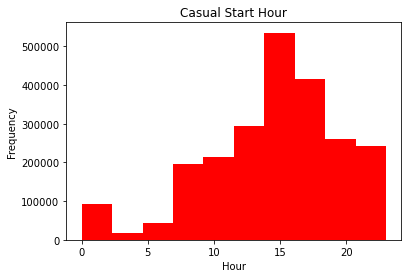

In [29]:
#plot a histogram of start hours for casuals
plt.hist(x = df_casual["start_hour"],color="red")
plt.title("Casual Start Hour")
plt.xlabel("Hour")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

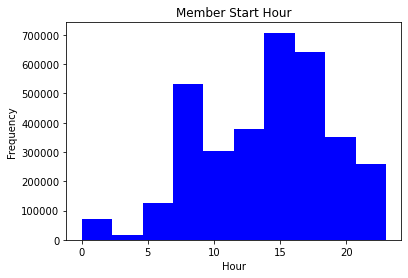

In [30]:
#plot a histogram of start hours for casuals
plt.hist(x = df_member["start_hour"], color = "blue")
plt.title("Member Start Hour")
plt.xlabel("Hour")
plt.ylabel("Frequency")

### member vs casual ride duration

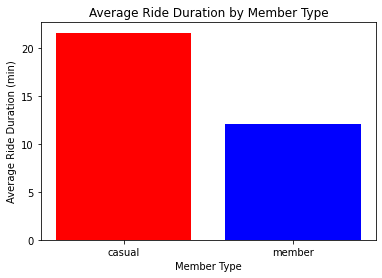

In [31]:
# Calculate the mean ride duration for each member type
avg_durations = df.groupby('member_casual')['duration_min'].mean()

# Create a bar chart of the average ride duration for each member type
plt.bar(x=avg_durations.index, height=avg_durations.values, color = ("red" , "blue"))

# Add labels and title to the chart
plt.xlabel('Member Type')
plt.ylabel('Average Ride Duration (min)')
plt.title('Average Ride Duration by Member Type')

# Show the chart
plt.show()

### monthly data

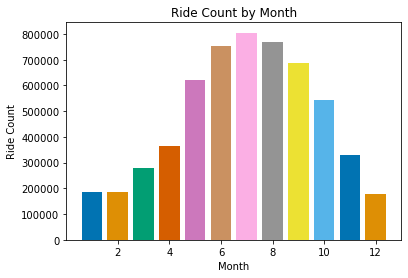

In [32]:
# Create a dataframe with monthly ride counts
monthly_counts = df.groupby('month')['ride_id'].count()

# Create a bar chart
plt.bar(monthly_counts.index, monthly_counts.values, width=0.8,color = sns.color_palette('colorblind'))

# Set the x-axis label and title
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.title('Ride Count by Month')

# Show the plot
plt.show()

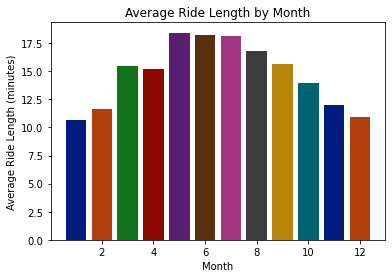

In [33]:
# Group the data by month and calculate the average ride length
avg_ride_length = df.groupby('month')['duration_min'].mean()

# Create a bar chart
plt.bar(avg_ride_length.index, avg_ride_length.values, color = sns.color_palette('dark'))

# Set the x-axis label and title
plt.xlabel('Month')
plt.ylabel('Average Ride Length (minutes)')
plt.title('Average Ride Length by Month')

# Show the plot
plt.show()

### seasonal data

In [34]:
# Create a new column for season by mapping the month column
# Create a dictionary mapping each month to a season
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Create a new column for season by mapping the month column
df['season'] = df['month'].map(seasons)
df.head()

C:\Users\Christian\AppData\Local\Temp\ipykernel_156\821480479.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['month'].map(seasons)


,ride_id,member_casual,rideable_type,started_at,ended_at,start_date,start_hour,end_hour,duration_min,month,weekday,season
0,600CFD130D0FD2A4,casual,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,2022-06-30,17,17,7.0,6,Thursday,Summer
1,F5E6B5C1682C6464,casual,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,2022-06-30,18,18,7.0,6,Thursday,Summer
2,B6EB6D27BAD771D2,casual,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,2022-06-30,11,12,13.0,6,Thursday,Summer
3,C9C320375DE1D5C6,casual,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,2022-06-30,11,11,4.0,6,Thursday,Summer
4,56C055851023BE98,casual,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,2022-06-29,23,23,8.0,6,Wednesday,Summer


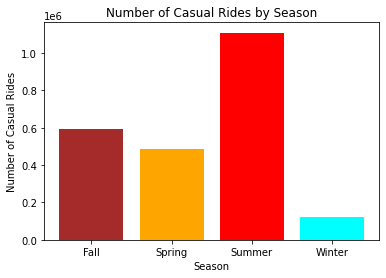

In [35]:
# Filter the data to only include member rides
member_rides = df[df['member_casual'] == 'casual']

# Group the data by season and calculate the count of rides for each season
season_member_rides = member_rides.groupby('season')['ride_id'].count()

# Create a bar chart
plt.bar(season_member_rides.index, season_member_rides.values,color = ("brown","orange",'red',(0,1,1)))
plt.xlabel('Season')
plt.ylabel('Number of Casual Rides')
plt.title('Number of Casual Rides by Season')
plt.show()

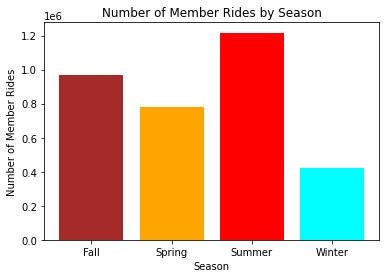

In [36]:
# Filter the data to only include member rides
member_rides = df[df['member_casual'] == 'member']

# Group the data by season and calculate the count of rides for each season
season_member_rides = member_rides.groupby('season')['ride_id'].count()

# Create a bar chart
plt.bar(season_member_rides.index, season_member_rides.values,color = ("brown","orange",'red',(0,1,1)))
plt.xlabel('Season')
plt.ylabel('Number of Member Rides')
plt.title('Number of Member Rides by Season')
plt.show()

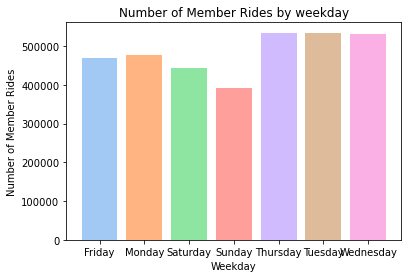

In [37]:
# number of member rides weekend vs weekday

# Filter the data to only include member rides
member_rides = df[df['member_casual'] == 'member']

# Group the data by season and calculate the count of rides for each season
season_member_rides = member_rides.groupby('weekday')['ride_id'].count()

# Create a bar chart
plt.bar(season_member_rides.index, season_member_rides.values, color = sns.color_palette('pastel'))
plt.xlabel('Weekday')
plt.ylabel('Number of Member Rides')
plt.title('Number of Member Rides by weekday')
plt.show()

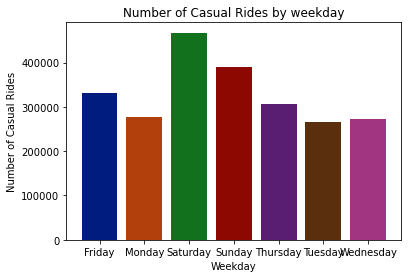

In [38]:
# number of casual rides weekend vs weekday

# Filter the data to only include member rides
member_rides = df[df['member_casual'] == 'casual']

# Group the data by season and calculate the count of rides for each season
season_member_rides = member_rides.groupby('weekday')['ride_id'].count()

# Create a bar chart
plt.bar(season_member_rides.index, season_member_rides.values, color = sns.color_palette('dark'))
plt.xlabel('Weekday')
plt.ylabel('Number of Casual Rides')
plt.title('Number of Casual Rides by weekday')
plt.show()

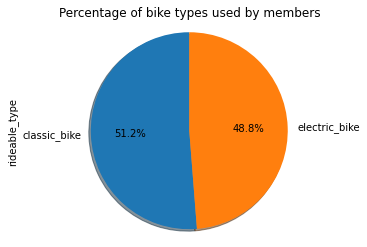

In [39]:
#how often do members use each type of bike
# count the number of occurrences for each kind of bike
bike_counts = df_member['rideable_type'].value_counts()

# create a pie chart
bike_counts.plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of bike types used by members')
plt.show()

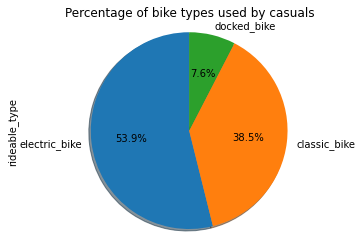

In [40]:
# count the number of occurrences for each kind of bike
bike_counts = df_casual['rideable_type'].value_counts()

# create a pie chart
bike_counts.plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of bike types used by casuals')
plt.show()

## Observations and Conclusion

According to the data there are 6 observations that stick out to me. 
1. casual riders do not experience a sharp increase in ride between 5am and 10am
2. casual riders take longer trips
3. casual riders greatly decrease in the winter compared to member riders
4. casual riders have a greater increase on weekends compared to member riders
5. casual riders like the docked bike and members do not use the docked bike
6. casual riders greatly increased in the summer compared to other seasons

I think it is possible that casual riders are younger than older riders because:
1. younger people have more free time and casuals have longer ride lengths than members
2. casual riders do not have the same increase in the morning that members do which may be caused by members rideing to work
3. member riders are consistent on the weekdays and weekends and casual riders have a large increase on the weekends. Maybe casual riders are using bikes more recreationally on the weekends

Also, casual riders increase more in the summer while the members are more consistent.